##**mount drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##**unzip dataset**

In [ ]:
import zipfile
import os 
os.chdir("/content")
path_of_zip_file="/content/gdrive/MyDrive/vision_dataset/Data.zip"

with zipfile.ZipFile(path_of_zip_file, 'r') as zip_ref:
      zip_ref.extractall("/content")

##**Import required libraries**

In [ ]:
!pip install opencv-contrib-python==4.4.0.44
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random
import seaborn as sns

##**part B : BOW and k_means**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import os

sift = cv2.SIFT_create()
lenght_vector=np.zeros([2985])
features_space=np.zeros([0,128])
k_means_feature=np.zeros([0,128])
label_list=[]
path_of_train_set="/content/Data/Train"
j=-1
#iterate all over train_set
for i,(root, dirs, files) in enumerate(os.walk(path_of_train_set)):
    if(i!=0):
       label = str(root).split("/")[-1]
       for name in glob.glob(f'{root}/*.jpg'):
          j+=1
          # label_list.append(label)
          if(j//5==0):
            image=cv2.imread(str(name), cv2.IMREAD_GRAYSCALE)
            kp1, des1 = sift.detectAndCompute(image,None)
            k_means_feature=np.concatenate((k_means_feature,des1), axis=0)
          else :
             continue  

##**using k_means for ectract dictionaty words** 

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=100,init='k-means++',max_iter=300, random_state=0).fit(k_means_feature)


##**Make train_set histogram**



In [ ]:
import time
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(kmeans.cluster_centers_)
label_list=[]
label_of_train_data_set=[]

hist_train=np.zeros([2985,100]).astype(np.float16)
j=-1
start_index=0

for i,(root, dirs, files) in enumerate(os.walk(path_of_train_set)):
    if(i!=0):

       label = str(root).split("/")[-1]
       label_list.append(label)
       for name in glob.glob(f'{root}/*.jpg'):
          j+=1
          label_of_train_data_set.append(i)
          image=cv2.imread(str(name), cv2.IMREAD_GRAYSCALE)
          kp1, des1 = sift.detectAndCompute(image,None)
          labels=neigh.kneighbors(des1, return_distance=False)
          for lebel in labels:
             hist_train[j,int(lebel)]+=1
          hist_train[j,:]=hist_train[j,:]/des1.shape[0]   


##**Make Histogram of test set**

In [ ]:
path_of_test_set="/content/Data/Test"
hist_test=np.zeros([1500,100]).astype(np.float16)
label_of_test_data_set=[]
j=-1
for i,(root, dirs, files) in enumerate(os.walk(path_of_test_set)):
    if(i!=0):
       for name in glob.glob(f'{root}/*.jpg'):
          label_of_test_data_set.append(i)
          j+=1
          image=cv2.imread(str(name), cv2.IMREAD_GRAYSCALE)
          kp1, des1 = sift.detectAndCompute(image,None)
          labels=neigh.kneighbors(des1, return_distance=False)
          for lebel in labels:
             hist_test[j,int(lebel)]+=1
          hist_test[j,:]=hist_test[j,:]/des1.shape[0]   

#**Measure acc**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

predicted_lable_list=[]
true_predication=0
X = np.array(hist_train)
y = np.array(label_of_train_data_set)
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)

for i,test_data in enumerate(hist_test) :
   
   prediction=int(clf.predict([test_data]))
   predicted_lable_list.append(prediction)
   if(label_of_test_data_set[i]==prediction):
       true_predication+=1
    
acc=float(true_predication/1500)      
print(acc*100)

52.666666666666664


##**confusion matrix**


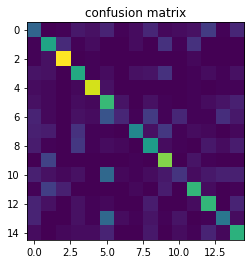

[[30  0  1  6  4  9  1  3 10  2  3  4 16  1 10]
 [ 1 54 11  1  3  0  0  3  0 13  1 13  0  0  0]
 [ 1  4 92  0  1  0  0  0  0  0  0  2  0  0  0]
 [ 5  4  0 56  1  3  0  4  5 13  0  1  3  1  4]
 [ 3  2  0  2 86  4  0  0  0  0  0  1  0  1  1]
 [ 4  2  0  3  2 62  5  0  4  1  0  1  3  5  8]
 [ 9  2  0  4  3 24 10  1 16  1 10  1  1 12  6]
 [ 8  7  0 13  1  1  0 43  4 15  1  3  2  0  2]
 [ 7  1  0 15  1  3  2  0 51  3  1  0  6  3  7]
 [ 0 18  0  0  0  0  0  1  0 75  0  5  1  0  0]
 [ 8  4  2  4  0 31  2  1  3  6 14  3  6  8  8]
 [ 1 17  8  0  0  0  0  2  0  7  0 61  3  0  1]
 [ 9  4  0  4  1  2  0  0  7  0  0  3 61  0  9]
 [ 9  0  0  4  1 31  3  1  5  1  5  0  1 36  3]
 [ 3  0  2  3  3  9  0  0  6  0  3  1  9  2 59]]


In [ ]:
from sklearn.metrics import confusion_matrix
con_matrix=confusion_matrix(label_of_test_data_set, predicted_lable_list)

plt.imshow(con_matrix)
plt.title("confusion matrix")
plt.show()
print(con_matrix)